# Data Collection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
#import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

data=pd.read_csv('diabetes.csv')
print(data.shape)
data.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Analysis

In [2]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

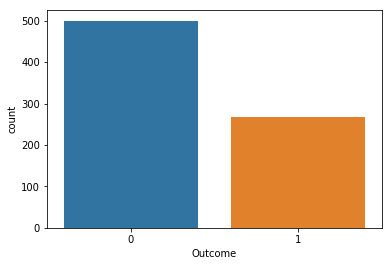

In [3]:
sn.countplot(x='Outcome',data=data)

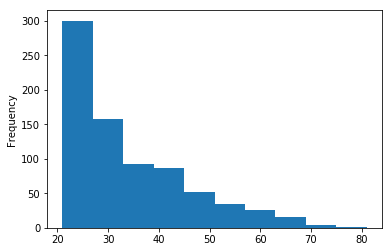

In [4]:
data['Age'].plot.hist()

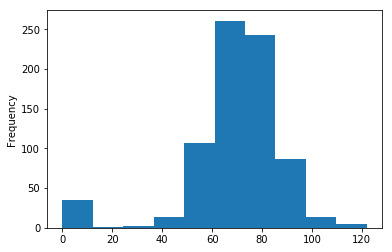

In [5]:
data['BloodPressure'].plot.hist()

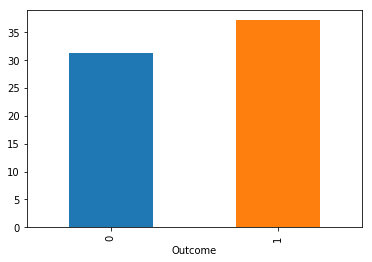

In [6]:
data.groupby('Outcome')['Age'].mean().plot.bar()

In [7]:
data_1=data[data['Outcome']==1]
#data_1

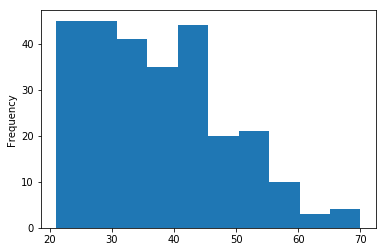

In [8]:
data_1['Age'].plot.hist()

# Data Wrangling

In [9]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
print(data.shape)
data.dtypes

(768, 9)


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

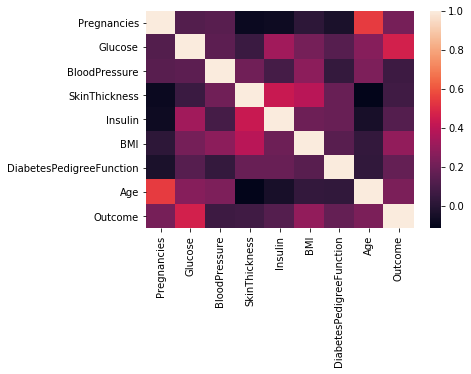

In [11]:
sn.heatmap(data.corr())

# Train and Test Data

In [12]:
x=data.drop('Outcome',axis=1)
y=data['Outcome']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=40)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(614, 8) (154, 8) (614,) (154,)


# Logistic Regression

ts_score= []
for j in range(100):
    x_train, x_test,y_train,y_test = train_test_split(x,y,random_state=j,stratify=y)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)                                                  
    ts_score.append(lr.score(x_test,y_test))
k=ts_score.index(np.max(ts_score))
k

In [13]:
lreg=LogisticRegression()
lreg.fit(x_train,y_train)
pred=lreg.predict(x_test)
pred

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0],
      dtype=int64)

In [14]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.75      0.89      0.81        95
          1       0.75      0.51      0.61        59

avg / total       0.75      0.75      0.73       154



In [15]:
confusion_matrix(y_test,pred)

array([[85, 10],
       [29, 30]], dtype=int64)

In [16]:
accuracy_score(y_test,pred)

0.7467532467532467

# Decision Tree

ts_score= []
for j in range(100):
    x_train, x_test,y_train,y_test = train_test_split(x,y,random_state=j,stratify=y)
    clf=DecisionTreeClassifier()
    clf.fit(x_train, y_train)                                                  
    ts_score.append(clf.score(x_test,y_test))
k=ts_score.index(np.max(ts_score))
print(k)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=k,stratify=y)
print(x_train.shape,x_test.shape)

In [17]:
clf=DecisionTreeClassifier(criterion='entropy')
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [18]:
y_pred=clf.predict(x_test)

In [19]:
accuracy_score(y_test,y_pred)

0.7597402597402597

# Random Forest

ts_score= []
for j in range(100):
    x_train, x_test,y_train,y_test = train_test_split(x,y,random_state=j,stratify=y)
    clf=RandomForestClassifier()
    clf.fit(x_train, y_train)                                                  
    ts_score.append(clf.score(x_test,y_test))
k=ts_score.index(np.max(ts_score))
print(k)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=k,stratify=y)

In [20]:
clf_1=RandomForestClassifier(criterion="entropy")
clf_1.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [22]:
y_pred=clf_1.predict(x_test)

In [23]:
accuracy_score(y_test,y_pred)

0.7662337662337663

# K-Nearest Neighbours

ts_score=[]
for j in range(100):
    x_train, x_test,y_train,y_test = train_test_split(x,y,random_state=j,stratify=y)
    clf=KNeighborsClassifier()
    clf.fit(x_train, y_train)                                                  
    ts_score.append(lr.score(x_test,y_test))
j=ts_score.index(np.max(ts_score))
print(j)
x_train, x_test, y_train, y_test =train_test_split(x,y,random_state=j,stratify=y)

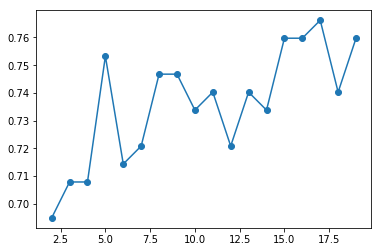

In [24]:
sc=[]
for k in range(2,20):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    pred=knn.predict(x_test)
    sc.append(accuracy_score(y_test,pred))
frame=pd.DataFrame({'K':range(2,20),'Score':sc})
plt.plot(frame['K'],frame['Score'],marker='o')

In [25]:
knn=KNeighborsClassifier(n_neighbors=17)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)

In [26]:
pred

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [27]:
accuracy_score(y_test,pred)

0.7662337662337663

In [28]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

             precision    recall  f1-score   support

          0       0.75      0.93      0.83        95
          1       0.81      0.51      0.62        59

avg / total       0.77      0.77      0.75       154

[[88  7]
 [29 30]]


#to find k value
error=[]
for i in range(3, 100, 2):
    knn= KNeighborsClassifier(n_neighbors= i)
    knn.fit(x_train, y_train)
    pred_y_test=knn.predict(x_test)
    error.append(np.mean(pred_y_test!= y_test))
    

import matplotlib.pyplot as plt
plt.plot(range(3, 100, 2), error, color = 'blue', linestyle= "dashed", marker='o',markerfacecolor="red", markersize=10)
plt.title("error rate k value")
plt.xlabel("k_label")
plt.ylabel("mean error")

from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))